In [1]:
import sys
!{sys.executable} -m pip install PyPortfolioOpt

In [2]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
stock_table = pd.read_csv("data/stock_table.csv")
stock_table.head()

,Date,AAPL,ADBE,AMZN,BTC-USD,FB,GCF,IRX,MSFT,NVDA,QCOM,TSLA,TXN
0,2019-05-31,42.897572,270.899994,1775.069946,8574.501953,177.470001,1305.800049,2.293,121.004944,33.731499,62.937698,37.032001,98.278275
1,2019-06-03,42.463867,259.029999,1692.689941,8208.995117,164.149994,1322.699951,2.280,117.247993,33.313152,62.786995,35.793999,99.088554
2,2019-06-04,44.017353,268.709991,1729.560059,7707.770996,167.500000,1323.400024,2.295,120.496185,35.609070,64.472992,38.720001,102.810135
3,2019-06-05,44.727940,272.859985,1738.500000,7824.231445,168.169998,1328.300049,2.285,123.108437,35.180756,63.703083,39.318001,103.149323
4,2019-06-06,45.384624,274.799988,1754.359985,7822.023438,168.330002,1337.599976,2.255,125.055389,35.803291,64.244873,41.189999,103.818260


In [4]:
stock_table = stock_table.set_index("Date")
stock_table = stock_table.apply(pd.to_numeric, errors="coerce")

In [5]:
returns = expected_returns.mean_historical_return(stock_table) 
covariance = risk_models.sample_cov(stock_table)

In [6]:
returns

AAPL       0.942560
ADBE       0.555112
AMZN       0.460766
BTC-USD    1.239472
FB         0.469905
GCF        0.190605
IRX       -0.901611
MSFT       0.586565
NVDA       1.771699
QCOM       0.599605
TSLA       4.293933
TXN        0.464128
dtype: float64

In [7]:
covariance.head()

,AAPL,ADBE,AMZN,BTC-USD,FB,GCF,IRX,MSFT,NVDA,QCOM,TSLA,TXN
AAPL,0.159902,0.122374,0.089892,0.065500,0.113550,0.009672,0.007531,0.119410,0.156840,0.125706,0.151079,0.107133
ADBE,0.122374,0.173207,0.099771,0.065922,0.120188,0.008310,-0.257762,0.128805,0.166986,0.125936,0.162118,0.113322
AMZN,0.089892,0.099771,0.107871,0.043750,0.091153,0.007182,-0.207408,0.088914,0.113968,0.084158,0.122446,0.074466
BTC-USD,0.065500,0.065922,0.043750,0.720710,0.057239,0.025317,-1.090913,0.063972,0.090325,0.095566,0.147428,0.074691
FB,0.113550,0.120188,0.091153,0.057239,0.167990,0.009756,-0.263890,0.106740,0.139653,0.103167,0.126537,0.088456


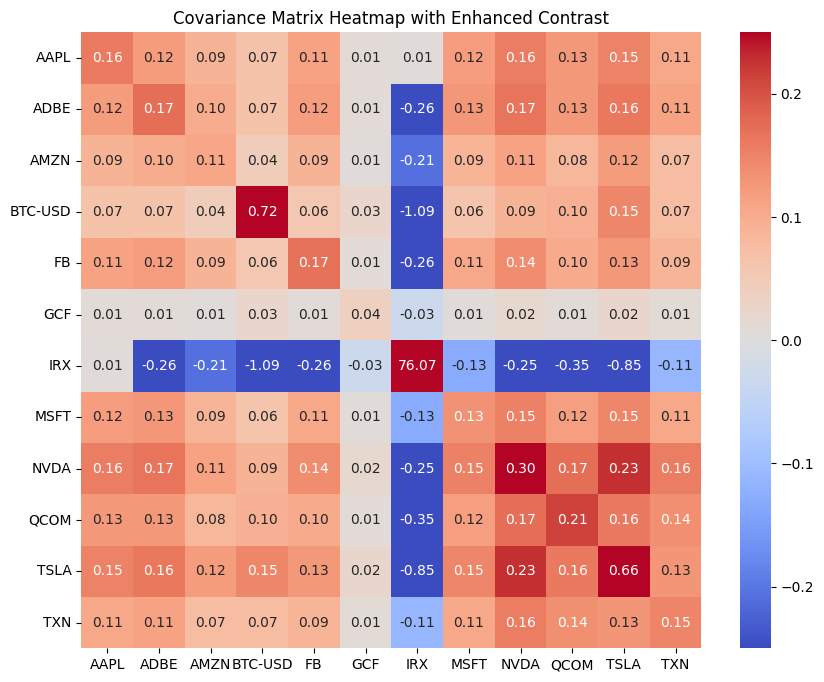

In [8]:
plt.figure(figsize=(10, 8))  
sns.heatmap(
    covariance, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",  
    vmin=-0.25, 
    vmax=0.25,  
    center=0 
)

plt.title("Covariance Matrix Heatmap with Enhanced Contrast")
plt.show()

In [9]:
ef = EfficientFrontier(returns, covariance) 
weights = ef.max_sharpe()

clean_weights = ef.clean_weights()

clean_weights

OrderedDict([('AAPL', 0.0),
             ('ADBE', 0.0),
             ('AMZN', 0.0),
             ('BTC-USD', 0.05011),
             ('FB', 0.0),
             ('GCF', 0.01629),
             ('IRX', 0.00834),
             ('MSFT', 0.0),
             ('NVDA', 0.14477),
             ('QCOM', 0.0),
             ('TSLA', 0.78049),
             ('TXN', 0.0)])

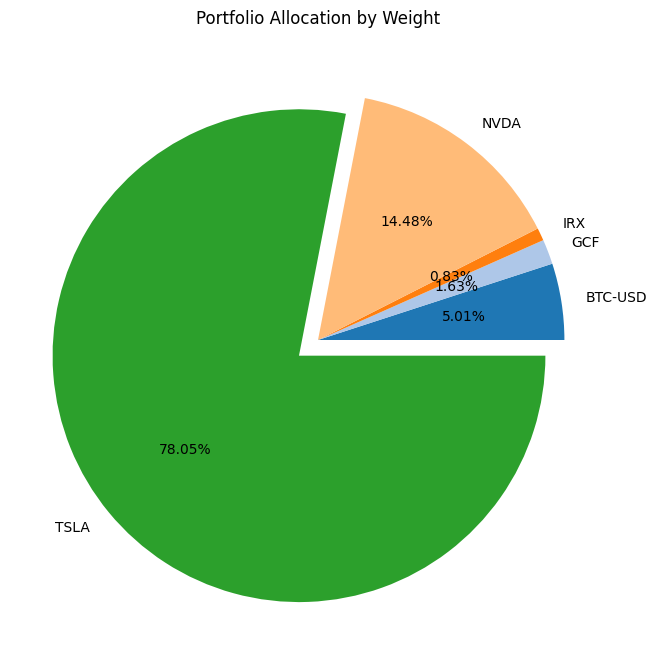

In [10]:
labels = list(clean_weights.keys())
sizes = list(clean_weights.values())

filtered_labels = [label for label, size in zip(labels, sizes) if size > 0]
filtered_sizes = [size for size in sizes if size > 0]

plt.figure(figsize=(8, 8))
plt.pie(
    filtered_sizes,
    labels=filtered_labels,
    autopct="%1.2f%%",  
    startangle=0,     
    explode=[0.1 if size == max(filtered_sizes) else 0 for size in filtered_sizes], 
    colors=plt.cm.tab20.colors  
)
plt.title("Portfolio Allocation by Weight")
plt.show()


In [11]:
stock_table2 = pd.read_csv("data/merged_stocks_data.csv")
stock_table2.head()

,Date,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,Company
0,2021-12-01,167.480,170.3000,164.53,164.77,162.119122,152423003,0.0,1.0,AAPL
1,2021-12-02,158.735,164.2000,157.80,163.76,161.125371,136739174,0.0,1.0,AAPL
2,2021-12-03,164.020,164.9600,159.72,161.84,159.236261,118023116,0.0,1.0,AAPL
3,2021-12-06,164.290,167.8799,164.28,165.32,162.660273,107496982,0.0,1.0,AAPL
4,2021-12-07,169.080,171.5800,168.34,171.18,168.425996,120405352,0.0,1.0,AAPL


In [12]:
pivot_df = stock_table2.pivot(index='Date', columns='Company', values='Close')
stock_table2 = pivot_df.dropna()
stock_table2.head()

Company,AAPL,ADBE,AMD,AMZN,BRK.B,CVX,DIS,GOOGL,INTC,JNJ,KO,MA,META,MSFT,NFLX,NVDA,PG,TSLA,V,XOM
Date,,,,,,,,,,,,,,,,,,,,
2021-12-01,164.77,657.41,149.11,3443.72,275.00,112.10,142.15,2821.03,48.60,158.08,52.30,306.28,310.60,330.08,617.77,314.35,146.40,1095.00,190.16,59.79
2021-12-02,163.76,671.88,150.68,3437.36,279.09,115.14,147.20,2859.32,49.50,157.09,53.07,320.20,310.39,329.49,616.47,321.26,147.26,1084.60,198.29,61.28
2021-12-03,161.84,616.53,144.01,3389.79,277.43,114.41,146.22,2840.03,49.25,159.38,53.54,322.11,306.84,323.01,602.13,306.93,149.88,1014.97,196.32,60.89
2021-12-06,165.32,622.04,139.06,3427.37,281.38,116.20,150.37,2863.10,50.99,162.94,54.91,333.33,317.87,326.19,612.69,300.37,152.15,1009.01,202.68,61.58
2021-12-07,171.18,649.96,144.85,3523.29,284.97,117.92,150.81,2945.39,52.57,163.36,55.21,339.51,322.81,334.92,625.58,324.27,151.75,1051.75,207.37,62.27


In [14]:
output_path = 'data/stock_table2.csv'  
stock_table2.to_csv(output_path, index=True) 

In [15]:
stock_table2 = stock_table2.apply(pd.to_numeric, errors="coerce")

In [16]:
returns2 = expected_returns.mean_historical_return(stock_table2) 
covariance2 = risk_models.sample_cov(stock_table2)

In [17]:
returns2

Company
AAPL     0.126229
ADBE    -0.079348
AMD     -0.029796
AMZN    -0.611020
BRK.B    0.207803
CVX      0.131580
DIS     -0.061558
GOOGL   -0.610486
INTC    -0.214444
JNJ     -0.005714
KO       0.072398
MA       0.203539
META     0.225051
MSFT     0.086662
NFLX     0.124736
NVDA    -0.246028
PG       0.070413
TSLA    -0.329016
V        0.183897
XOM      0.254646
dtype: float64

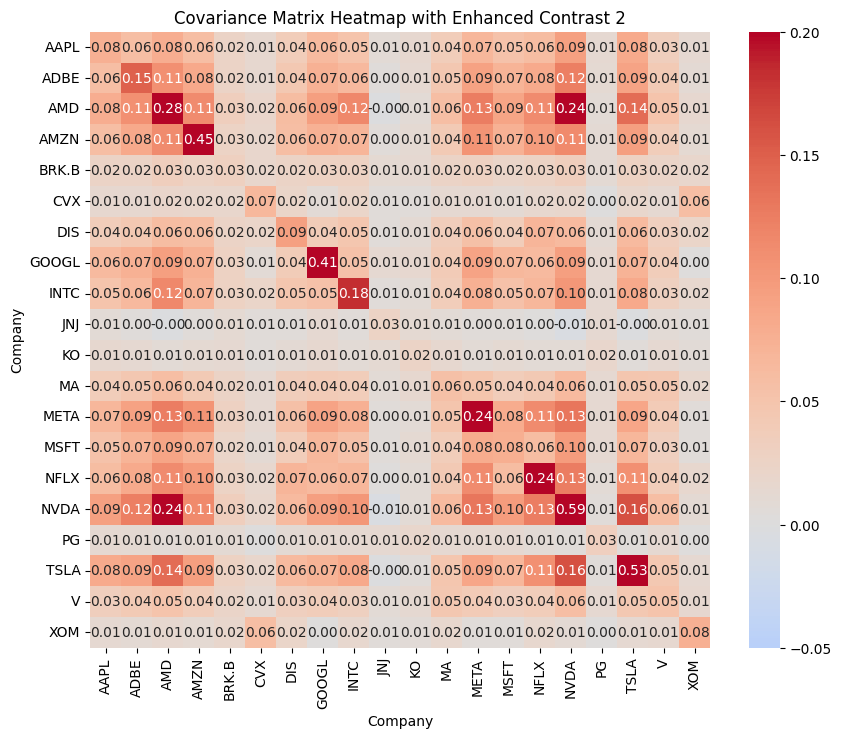

In [18]:
plt.figure(figsize=(10, 8))  
sns.heatmap(
    covariance2, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",  
    vmin=-0.05, 
    vmax=0.2,  
    center=0 
)

plt.title("Covariance Matrix Heatmap with Enhanced Contrast 2")
plt.show()

In [19]:
ef2 = EfficientFrontier(returns2, covariance2) 
weights2 = ef2.max_sharpe()

clean_weights2 = ef2.clean_weights()

clean_weights2

OrderedDict([('AAPL', 0.0),
             ('ADBE', 0.0),
             ('AMD', 0.0),
             ('AMZN', 0.0),
             ('BRK.B', 0.60294),
             ('CVX', 0.0),
             ('DIS', 0.0),
             ('GOOGL', 0.0),
             ('INTC', 0.0),
             ('JNJ', 0.0),
             ('KO', 0.0),
             ('MA', 0.10818),
             ('META', 0.01995),
             ('MSFT', 0.0),
             ('NFLX', 0.0),
             ('NVDA', 0.0),
             ('PG', 0.0),
             ('TSLA', 0.0),
             ('V', 0.0),
             ('XOM', 0.26892)])

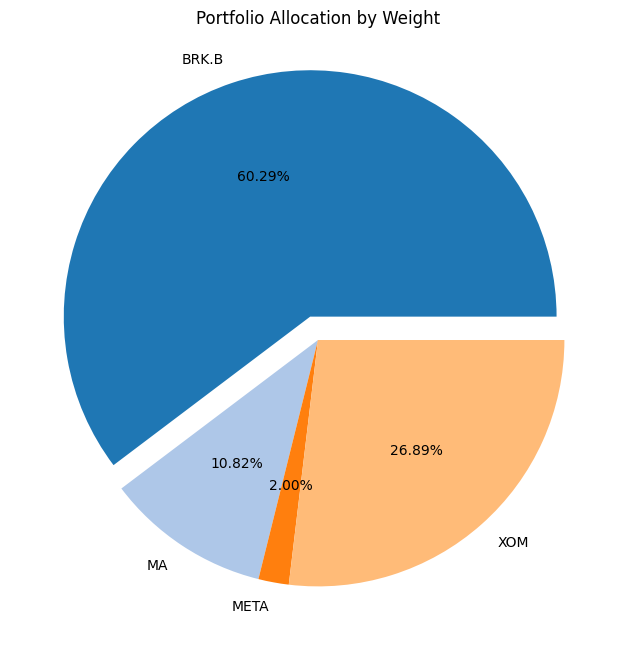

In [20]:
labels2 = list(clean_weights2.keys())
sizes2 = list(clean_weights2.values())

filtered_labels2 = [label for label, size in zip(labels2, sizes2) if size > 0]
filtered_sizes2 = [size for size in sizes2 if size > 0]

plt.figure(figsize=(8, 8))
plt.pie(
    filtered_sizes2,
    labels=filtered_labels2,
    autopct="%1.2f%%",  
    startangle=0,     
    explode=[0.1 if size == max(filtered_sizes2) else 0 for size in filtered_sizes2], 
    colors=plt.cm.tab20.colors  
)
plt.title("Portfolio Allocation by Weight")
plt.show()